# 🎲 DISCRETE PROBABILITY DISTRIBUTIONS

### 1. Binomial Distribution
✅ Use Case: Email Campaign Success

Real Example: Out of 1000 email recipients, how many will click the link (assuming 10% click rate)?

$$
 P(X=k)= \frac{n}{k}\ p^k(1−p)^{n−k}
$$

Where:

n = number of trials

k = number of successes

p = probability of success in each trial

* How p is used: p directly impacts the shape of the binomial distribution. A higher p makes the distribution shift towards more successes (right-skewed), and a lower p makes the distribution shift towards more failures (left-skewed).

* Example: If you have a 10% chance of success on each trial (i.e., p = 0.1), the binomial distribution will reflect that on the number of successes over many trials.


* Decision Insight: Helps forecast campaign performance and set realistic KPIs. If actual clicks are far below expected binomial probabilities → optimize your subject line, call to action, or target audience.

In [35]:
# What’s the probability of getting 120 or more clicks?
from scipy.stats import binom

p = 0.1  # click rate
n = 1000
prob = 1 - binom.cdf(80, n, p)
print(f"P(≥120 clicks out of 1000) = {prob:.4f}")


P(≥120 clicks out of 1000) = 0.9824


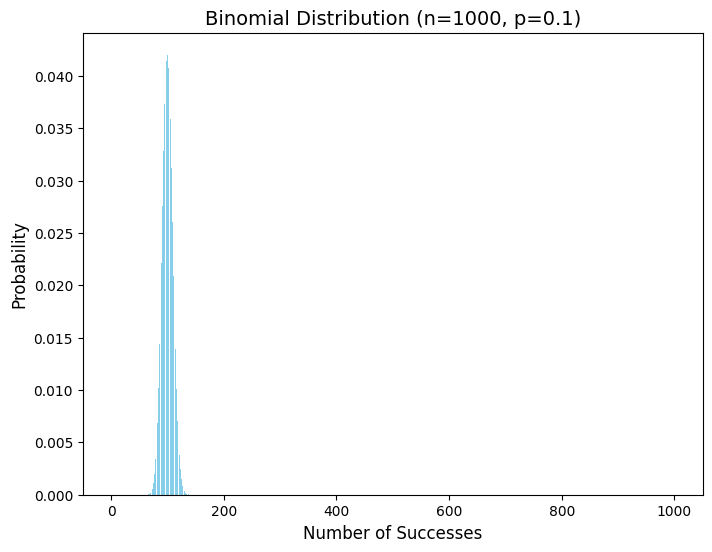

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 1000  # Number of trials
p = 0.1   # Probability of success

# Generate binomial distribution data
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

# Plotting the binomial distribution
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')
plt.title('Binomial Distribution (n=1000, p=0.1)', fontsize=14)
plt.xlabel('Number of Successes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


### 2. Multinomial Distribution
✅ Use Case: Customer Support Ticket Categorization

Real Example: You received 100 support tickets. Historical distribution: 50% billing, 30% tech, 20% general.

$$
P(X_1 = x_1, X_2 = x_2, \dots, X_k = x_k) = \frac{n!}{x_1! x_2! \dots x_k!} p_1^{x_1} p_2^{x_2} \dots p_k^{x_k}
$$


Where:

n = number of trials

x_i = number of occurrences of outcome i

p_i = probability of outcome i

* How p is used:
    Each p_i represents the probability of a specific category or outcome, and the distribution describes the likelihood of obtaining different combinations of these outcomes across multiple trials.

    The sum of all p_i values should be 1.

* Example: In customer support, if p1 = 0.5 (for billing), p2 = 0.3 (for tech), and p3 = 0.2 (for general inquiries), these probabilities sum to 1, and the multinomial distribution can predict the probability of various ticket category combinations.


* Decision Insight: Helps forecast how many agents you need in each category.
If ticket distribution deviates, it may signal a product issue or billing change.
You can prioritize hiring/training in categories with higher ticket volumes than expected.

In [36]:
from scipy.stats import multinomial

expected_probs = [0.5, 0.3, 0.2]  # expected split
observed = [40, 45, 15]  # actual tickets
prob = multinomial.pmf(observed, n=100, p=expected_probs)
print(f"P(observing this ticket split) = {prob:.6f}")


P(observing this ticket split) = 0.000064


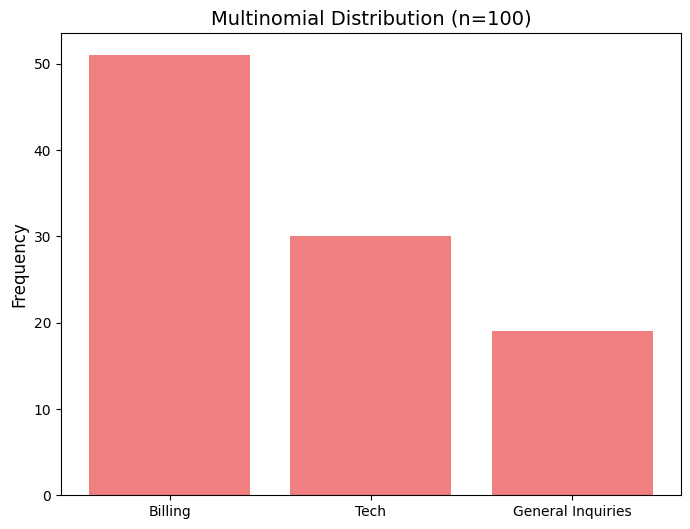

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Parameters
n = 100  # Number of trials
p = [0.5, 0.3, 0.2]  # Probabilities of three categories

# Generate multinomial distribution data
x = multinomial.rvs(n, p, size=1)

# Plotting the multinomial distribution
labels = ['Billing', 'Tech', 'General Inquiries']
plt.figure(figsize=(8, 6))
plt.bar(labels, x[0], color='lightcoral')
plt.title('Multinomial Distribution (n=100)', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### 3. Poisson Distribution
✅ Use Case: Call Center Staffing

Real Example: On average, 10 calls per hour. What’s the chance of getting more than 15 in the next hour?

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

Decision Insight: Predict call spikes and ensure you have enough staff during peak hours.
Helps in resource allocation without overstaffing.

Where:

    λ = average rate of occurrences (mean number of events)

    k = number of events observed

    e = Euler's number (approximately 2.71828)

How λ (p) is used:

    λ dictates how frequently events happen in the given interval. A higher λ means events are more frequent, and a lower λ means they are rarer.

    λ is a fixed parameter in the Poisson model that controls the distribution of the number of events occurring.

Example:
    If a call center receives an average of 10 calls per hour (i.e., λ = 10), you can use the Poisson distribution to predict the probability of receiving 12 calls in an hour.


In [38]:
from scipy.stats import poisson

lambda_ = 10
prob = 1 - poisson.cdf(15, mu=lambda_)
print(f"P(>15 calls in an hour) = {prob:.4f}")


P(>15 calls in an hour) = 0.0487


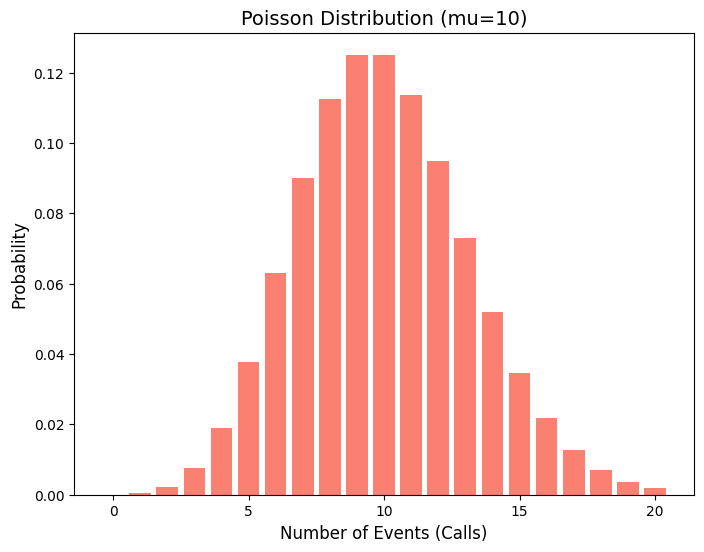

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
mu = 10  # Average number of events (calls per hour)

# Generate poisson distribution data
x = np.arange(0, 21)
y = poisson.pmf(x, mu)

# Plotting the Poisson distribution
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='salmon')
plt.title('Poisson Distribution (mu=10)', fontsize=14)
plt.xlabel('Number of Events (Calls)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


### 4. Hypergeometric Distribution
✅ Use Case: Quality Control in Manufacturing

Real Example: 5 out of 50 components in a shipment are defective. What’s the chance of picking 2 bad parts in a random sample of 5?

$$
P(X = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}
$$


Where:

N = population size

K = number of successes in the population

n = sample size

k = number of successes in the sample

How p is used:

    The probability of success in the population is captured by the ratio K/N, where K is the number of successes in the population and N is the total population size.

Example:

    If you have a population of 50 items and 10 of them are defective, p would be the proportion of defective items in the population, i.e., p = K/N = 10/50 = 0.2.
* Decision Insight: Supports inspection and sampling strategies — if this probability is high, your sampling process is likely to catch bad units.

In [13]:
from scipy.stats import hypergeom

prob = hypergeom.pmf(2, M=50, n=5, N=5)
print(f"P(2 defectives in 5 picks) = {prob:.4f}")


P(2 defectives in 5 picks) = 0.0670


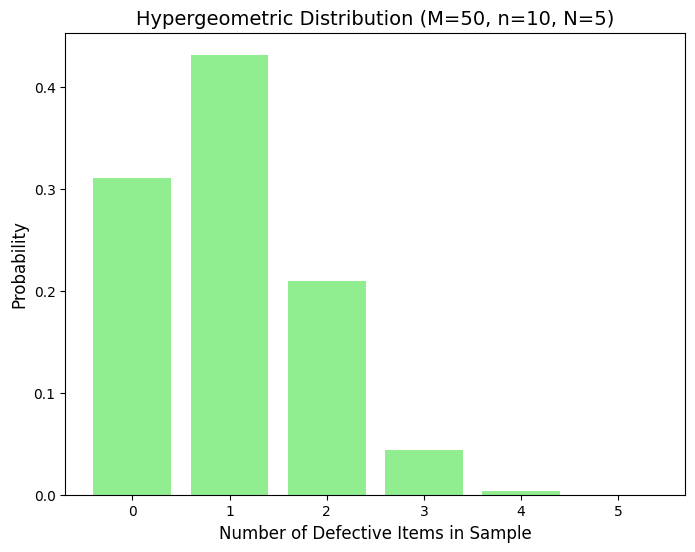

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# Parameters
M = 50  # Total population size
n = 10  # Number of defective items
N = 5   # Sample size

# Generate hypergeometric distribution data
x = np.arange(0, N+1)
y = hypergeom.pmf(x, M, n, N)

# Plotting the hypergeometric distribution
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='lightgreen')
plt.title('Hypergeometric Distribution (M=50, n=10, N=5)', fontsize=14)
plt.xlabel('Number of Defective Items in Sample', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.show()


# 🌊 Continuous Probability Distributions

### 5. Normal Distribution
✅ Use Case: Employee Performance Scores

Real Example: Mean = 70, SD = 10. What's the % of employees scoring between 60 and 80?

$$
P(X = x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$


Where:

    μ = mean

    σ = standard deviation

How p is used:

    p is not a parameter in the normal distribution. Instead, we use the mean (μ) and standard deviation (σ) to define the distribution.


Decision Insight: Use this to define performance tiers. For example, those scoring 1 SD below mean may need extra training.

In [40]:
prob = norm.cdf(80, loc=70, scale=10) - norm.cdf(60, loc=70, scale=10)
print(f"% scoring between 60–80 = {prob:.2%}")


% scoring between 60–80 = 68.27%


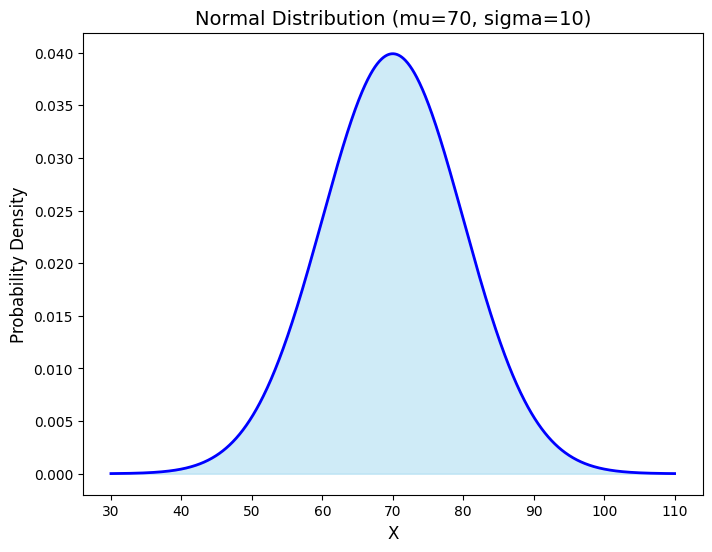

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 70  # Mean
sigma = 10  # Standard deviation

# Generate normal distribution data
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plotting the normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='b', linewidth=2)
plt.fill_between(x, y, color='skyblue', alpha=0.4)
plt.title('Normal Distribution (mu=70, sigma=10)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 6. Standard Normal Distribution
✅ Use Case: Benchmarking Scores
Real Example: A test score has been converted to a Z-score.

$$
P(Z = z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}}
$$

Where:

    Z = standard normal variable (Z-score)

How p is used:

    Similar to the normal distribution, p is not used directly in the standard normal distribution. We focus on the Z-score to standardize and compare different data points.


* Decision Insight: Use Z-scores to compare performance across departments with different scales or distributions.



In [49]:
prob = norm.cdf(1) - norm.cdf(-1)
print(f"P(-1 < Z < 1) = {prob:.2%}")


P(-1 < Z < 1) = 68.27%


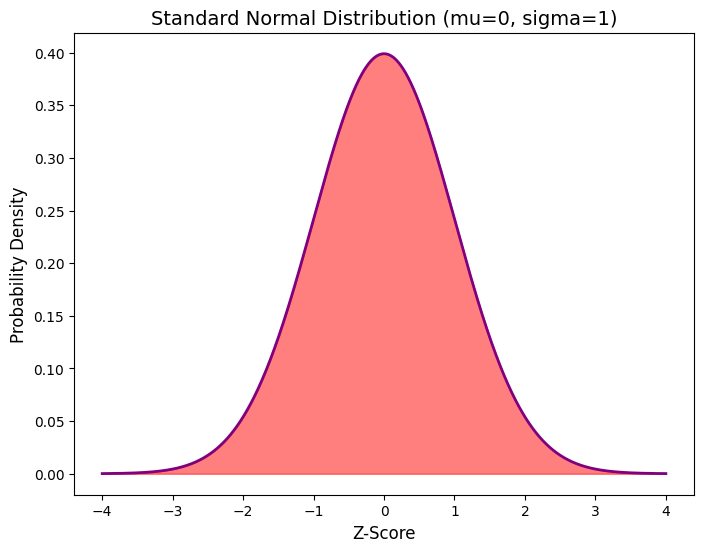

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate standard normal distribution data
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Plotting the standard normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='purple', linewidth=2)
plt.fill_between(x, y, color='red', alpha=0.5)
plt.title('Standard Normal Distribution (mu=0, sigma=1)', fontsize=14)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 7. Gamma Distribution
✅ Use Case: Customer Lifetime Value Modeling
Real Example: What’s the expected time until a customer makes 3 purchases?

$$
P(X = x) = \frac{x^{\alpha - 1} e^{-x/\beta}}{\Gamma(\alpha) \beta^{\alpha}}
$$

Where:

    α = shape parameter

    β = scale parameter

How p is used:

    In the gamma distribution, p is not explicitly defined; instead, the distribution is defined by the shape and scale parameters.

* Decision Insight: Helps predict customer retention and inform re-marketing efforts.

In [7]:
from scipy.stats import gamma

prob = gamma.cdf(90, a=3, scale=30)
print(f"P(3 events in ≤90 days) = {prob:.4f}")


P(3 events in ≤90 days) = 0.5768


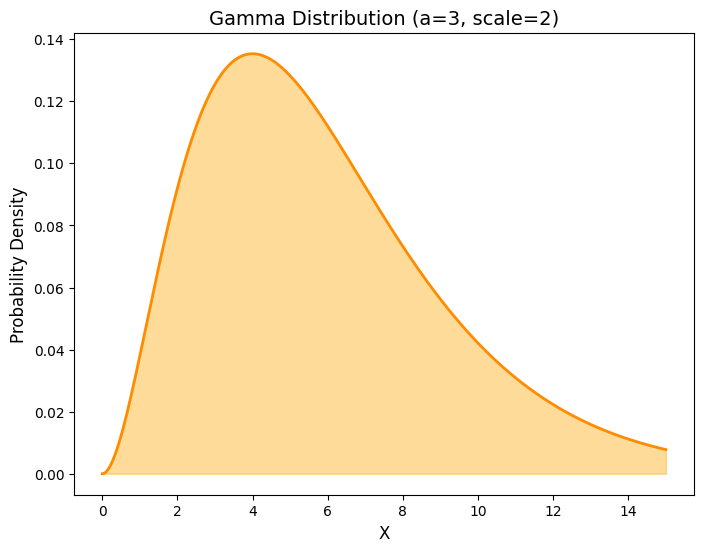

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters
a = 3  # Shape parameter
scale = 2  # Scale parameter

# Generate gamma distribution data
x = np.linspace(0, 15, 1000)
y = gamma.pdf(x, a, scale=scale)

# Plotting the gamma distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='darkorange', linewidth=2)
plt.fill_between(x, y, color='orange', alpha=0.4)
plt.title('Gamma Distribution (a=3, scale=2)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 8. Exponential Distribution
✅ Use Case: Time Between Sign-Ups or Logins
Real Example: What's the chance a user logs in again within 5 days?

$$
P(X = x) = \lambda e^{-\lambda x}
$$

Where:

    λ = rate (inverse of the average time between events)

How p (λ) is used:

    λ controls the rate at which events occur. A higher λ leads to more frequent events, while a smaller λ means events happen less frequently.

Example:

    If the average time between customer purchases is 7 days, then λ = 1/7.

Decision Insight: Helps segment active vs. inactive users, inform reminder notifications.

In [8]:
from scipy.stats import expon

scale = 7  # avg days between logins
prob = expon.cdf(5, scale=scale)
print(f"P(user returns within 5 days) = {prob:.2%}")


P(user returns within 5 days) = 51.05%


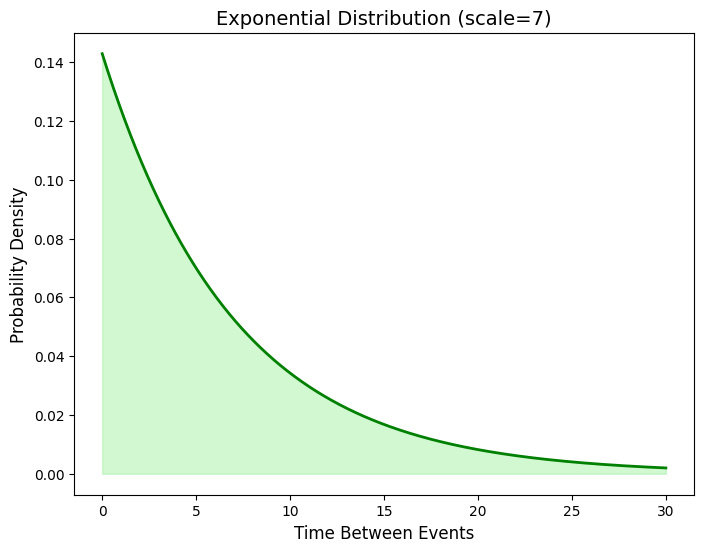

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
scale = 7  # Rate parameter (mean)

# Generate exponential distribution data
x = np.linspace(0, 30, 1000)
y = expon.pdf(x, scale=scale)

# Plotting the exponential distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='green', linewidth=2)
plt.fill_between(x, y, color='lightgreen', alpha=0.4)
plt.title('Exponential Distribution (scale=7)', fontsize=14)
plt.xlabel('Time Between Events', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 9. Chi-Square Distribution
✅ Use Case: Testing User Preferences Across Features
Real Example: Do users interact with app features equally?

$$
P(X = x) = \frac{x^{\frac{df}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{df}{2}} \Gamma\left(\frac{df}{2}\right)}
$$

Where:

    df = degrees of freedom

How p is used:

    p is not used explicitly. Instead, we focus on the degrees of freedom in chi-square tests.

Decision Insight: Identifies if user behavior significantly deviates from expectations, guiding UI/UX changes

In [21]:
from scipy.stats import chi2

stat, df = 9.2, 3
p_val = chi2.sf(stat, df)
print(f"P-value = {p_val:.4f}")


P-value = 0.0267


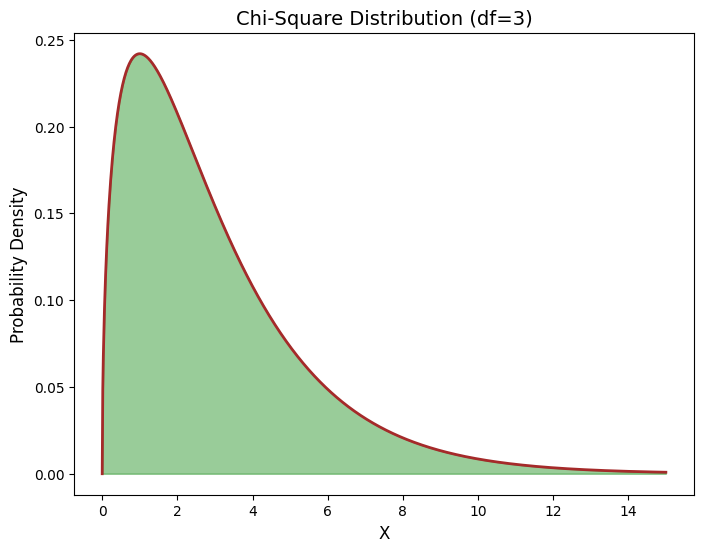

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters
df = 3  # Degrees of freedom

# Generate chi-square distribution data
x = np.linspace(0, 15, 1000)
y = chi2.pdf(x, df)

# Plotting the chi-square distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='brown', linewidth=2)
plt.fill_between(x, y, color='green', alpha=0.4)
plt.title('Chi-Square Distribution (df=3)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 10. Lognormal Distribution
✅ Use Case: Modeling Skewed Metrics (e.g., incomes, purchase amounts)
Real Example: What proportion of users spend under $100?

$$
P(X = x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln(x) - \mu)^2}{2\sigma^2}}
$$

Where:

    μ = mean of the log

    σ = standard deviation of the log

How p is used:

    p is not used directly in this distribution. Instead, the distribution is parameterized by μ and σ.



Decision Insight: Informs pricing strategies, segmenting high-spenders from low-spenders.

In [24]:
from scipy.stats import lognorm
import numpy as np

prob = lognorm.cdf(100, s=0.9, scale=np.exp(4.5))
print(f"P(spend ≤ $100) = {prob:.2%}")


P(spend ≤ $100) = 54.65%


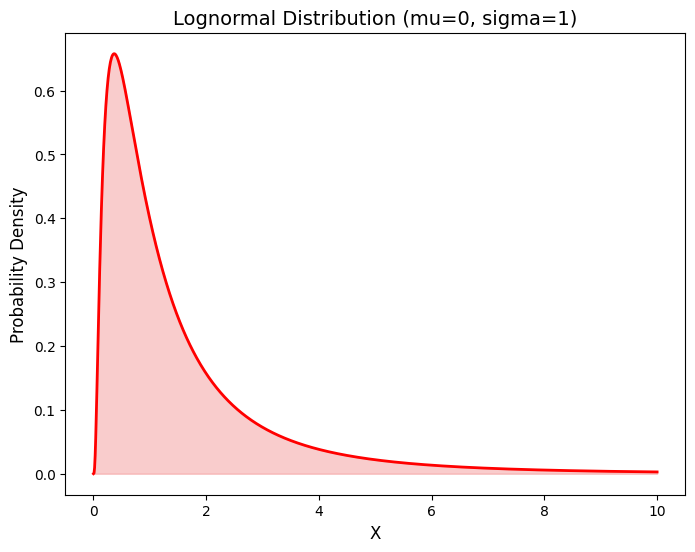

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters
mu = 0  # Mean of log
sigma = 1  # Standard deviation of log

# Generate lognormal distribution data
x = np.linspace(0, 10, 1000)
y = lognorm.pdf(x, sigma, scale=np.exp(mu))

# Plotting the lognormal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='red', linewidth=2)
plt.fill_between(x, y, color='lightcoral', alpha=0.4)
plt.title('Lognormal Distribution (mu=0, sigma=1)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()


### 11. Weibull Distribution
✅ Use Case: Predicting Time to Failure
Real Example: What's the probability a battery lasts under 2 years?

$$
P(X = x) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}
$$

Where:

    k = shape parameter

    λ = scale parameter

How p is used:

    p is not directly used in the Weibull distribution. The distribution is controlled by the shape and scale parameters.

Decision Insight: Supports warranty policies and maintenance scheduling.

In [9]:
from scipy.stats import weibull_min

prob = weibull_min.cdf(2, c=1.5, scale=3)
print(f"P(failure within 2 years) = {prob:.2%}")


P(failure within 2 years) = 41.98%


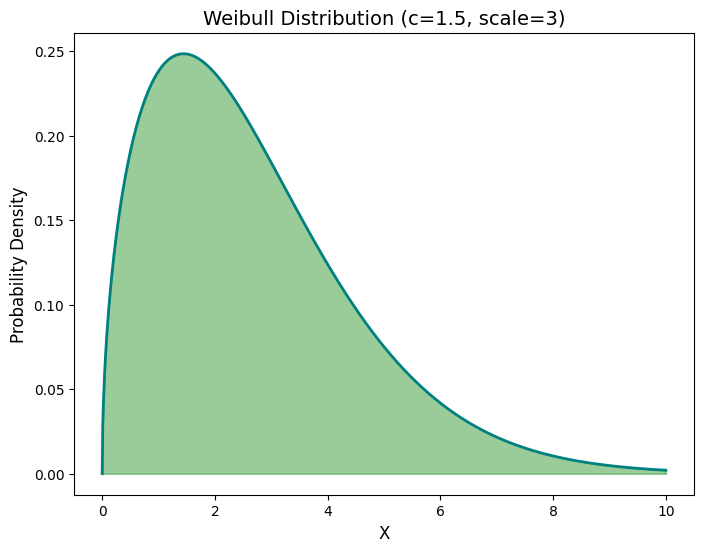

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parameters
c = 1.5  # Shape parameter
scale = 3  # Scale parameter

# Generate Weibull distribution data
x = np.linspace(0, 10, 1000)
y = weibull_min.pdf(x, c, scale=scale)

# Plotting the Weibull distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='teal', linewidth=2)
plt.fill_between(x, y, color='green', alpha=0.4)
plt.title('Weibull Distribution (c=1.5, scale=3)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()
